# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Круглое сечение

### Без разбиения

In [2]:
class Round_section:
    def __init__(self, L, R = 1):
        self.R = R
        self.L = L
        
    def coaxial_discs(self, s) -> float:
        x = s**2 + self.R**2 + self.R**2
        return 1/(2*self.R**2) * ( x - math.sqrt(x**2 - 4*self.R**2 * self.R**2) )
    
    def no_splitting(self) -> float:
        phi_12 = self.coaxial_discs(self.L)
        phi_21 = phi_12
        phi_11, phi_22 = 0, 0
        phi_13 = 1 - phi_11 - phi_12
        phi_23 = 1 - phi_21 - phi_22
        
        S_1 = math.pi * self.R**2
        S_3 = 2*math.pi*self.R * self.L
        phi_31 = phi_13 * S_1 / S_3
        phi_32 = phi_31
        phi_33 = 1 - phi_31 - phi_32
        
        k = phi_12 + phi_13 * phi_32 / ( 1 - phi_33 )
        return k

In [3]:
section_1 = Round_section(2)
section_1.no_splitting()

0.5857864376269049

### С разбиением

In [4]:
def splitting(self) -> float:
        phi_11, phi_55 = 0, 0
        phi_15 = self.coaxial_discs(self.L/2)
        phi_51 = phi_15
        phi_13 = 1 - phi_11 - phi_15

        S_1 = math.pi*self.R**2
        S_3 = 2*math.pi*self.R*self.L/2
        phi_31 = phi_13 * S_1 / S_3
        phi_35 = phi_31
        phi_33 = 1 - phi_31 - phi_35
        phi_53 = 1 - phi_55 - phi_51
        
        phi_22 = 0
        phi_52, phi_25 = phi_15, phi_15
        phi_54 = phi_13

        phi_45, phi_42 = phi_31, phi_31
        phi_44 = phi_33
        phi_24 = phi_53
        
        x = phi_54*phi_42/(1 - phi_44) + phi_52
        y = phi_13*phi_35/(1 - phi_33) + phi_15
        z = 1 - phi_53*phi_35/(1 - phi_33) * phi_54*phi_45/(1 - phi_44)
        k = x*y/z
        return k

In [5]:
Round_section.splitting = splitting
section_1.splitting()

0.5278640450004206

### Графики

In [6]:
def name(title):
    if title:
        plt.title(title)
    return

def save(filename):
    if filename:
        plt.savefig(filename)
    return

def graph(left, right, num, title = "", filename = ""):
    x = np.linspace(left,right,num)
    k = [Round_section(element).no_splitting() for element in x]
    plt.figure(figsize=(12,9))
    plt.scatter(x, k, label= 'Без разбиения', marker="o")
    plt.plot(x, k)
    
    k = [Round_section(element).splitting() for element in x]
    plt.scatter(x, k, label= 'С разбиением', marker= "o")
    plt.plot(x, k)
    
    plt.grid()
    plt.xlabel('L/R')
    plt.ylabel('k')
    plt.legend()
    name(title)
    save(filename)
    plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14172/1359622613.py:19: RuntimeWarning: invalid value encountered in double_scalars
  phi_31 = phi_13 * S_1 / S_3
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14172/1776683433.py:9: RuntimeWarning: invalid value encountered in double_scalars
  phi_31 = phi_13 * S_1 / S_3


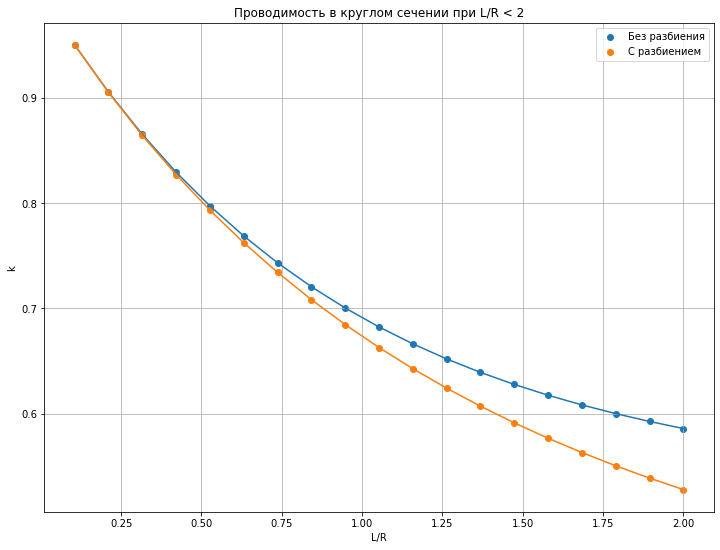

In [7]:
graph(0,2,20, "Проводимость в круглом сечении при L/R < 2", "L less then 2.png")

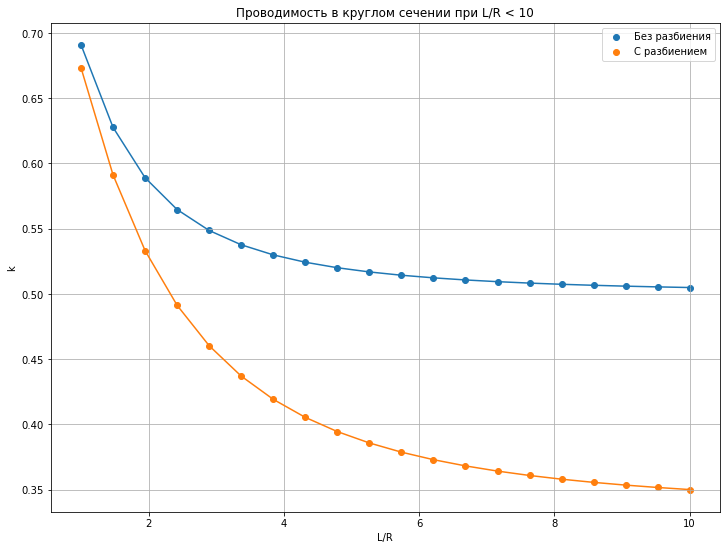

In [8]:
graph(1,10,20, "Проводимость в круглом сечении при L/R < 10", "L less then 10.png")

## Прямоугольное сечение